## Bayesian Models: the Beta-Binomial Model

## Bayesian Models: the Beta-Binomial Model

- In my opinion, the Beta-Binomial model is probably the most useful Bayesian model you can know. It's a very simple model for estimating probabilies, or fractions, or percentages: essentially numbers between 0 and 1. And we tend to do this alot. It's also building block for more complicated models.

- Your observations come from Binomial trials: you have capital N chances, and observe lowercase n successes:

$$ n \sim Bin(N,p) $$

- This is a pretty common situation: we want to know what $p$ is.

- The traditional way to estimate probabilties is to look at the ratio of success to total trials: something like lowercase n/ big N.

$$\hat{p} = \frac{n}{N}$$

 
- This calculation is pretty naive though: for small values of capital n, we can get pretty ridiculous results. If N=1, and small n is a 1, then we have an estimate of 100%. This is an extreme example, but it makes me feel uncomfortable. 

- In a Bayesian setting, we treat estimation differently: give a prior for $p$, we update that prior with the observed data, lowercase n and capital N, and form a posterior distribution of $p$. Note that we have created a distribution, not a single point. 

- For most cases, the prior is going to be uniform, i.e. you have no strong beliefs about p. 


It turns out that the $Uniform(0,1)$ is actually a special case of the Beta distribution: 

to abuse notation:

$$ Uniform(0,1) = Beta(1,1) $$

The beta distribution has two paramters: terribly named, alpha and beta:

In [1]:
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
from scipy.stats import beta
x = np.linspace(0,1,500)

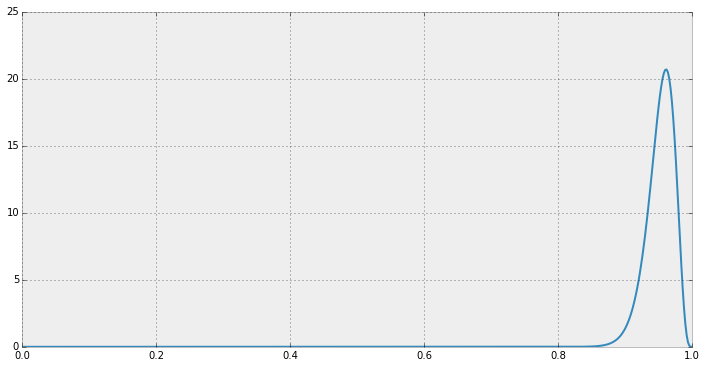

In [7]:
alpha_ = 100
beta_ = 5
plot(x, beta.pdf(x, alpha_, beta_))

$$ p \sim Beta(\alpha, \beta) $$
$$ n \sim Bin(N, p) $$

then

$$ p \;|\; n,N \sim Beta(\alpha + n, \beta + N - n )$$
 

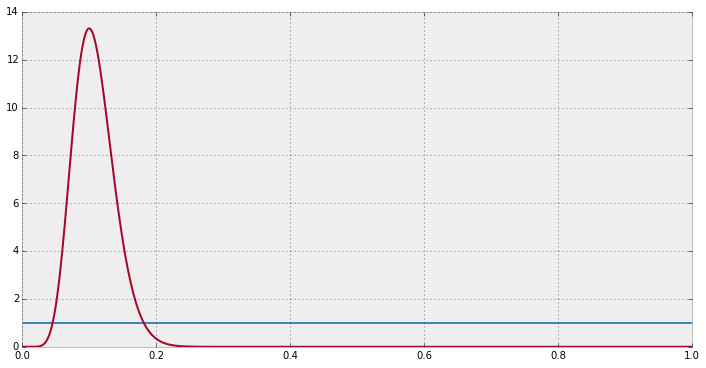

In [28]:
alpha_ = 1.
beta_ = 1.
plot(x, beta.pdf(x, alpha_, beta_))


N = 100
n = 10
plot(x, beta.pdf(x, alpha_ + n, beta_ + N - n))


In [19]:
samples = beta.rvs(alpha_ +n, beta_ + N-n, size=10000)

In [20]:
samples

array([ 0.9934,  0.6005,  0.3422,  0.4987, ...,  0.9747,  0.6254,  0.676 ,
        0.5305])

In [21]:
(samples > 0.30).mean()

0.26050000000000001

In [23]:
np.percentile(samples, 95)

0.97354527226820819

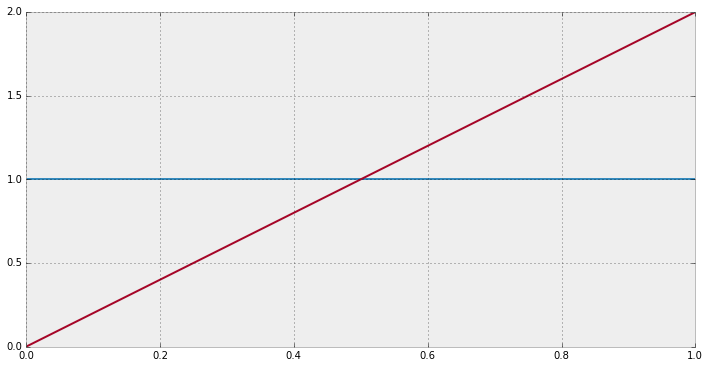

In [29]:
alpha_ = 1.
beta_ = 1.
plot(x, beta.pdf(x, alpha_, beta_))


N = 1
n = 1
plot(x, beta.pdf(x, alpha_ + n, beta_ + N - n))


In [30]:
samples = beta.rvs(alpha_ +n, beta_ + N-n, size=10000)

In [31]:
(samples < 0.50).mean()

0.25

(0.45, 0.55)

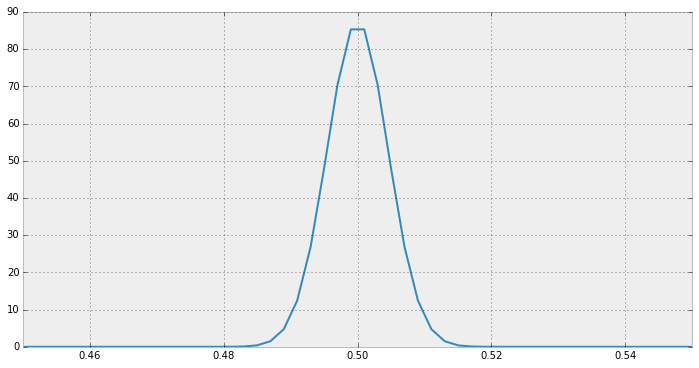

In [26]:
alpha_ = 1.
beta_ = 1.

N = 12000
n = 6000
plot(x, beta.pdf(x, alpha_ + n, beta_ + N - n))
plt.xlim(0.45,0.55)